<a href="https://colab.research.google.com/github/eriklidb/Foundations-of-Machine-Learning/blob/main/Ex1_VT2023_STUDENT_VERSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#! Required python packages: numpy
import numpy as np

# Exercise 1 - Introduction  (DD1420 VT23)

## Instructions

This Jupyter Notebook contains the exercises for DD1420 **Module 1 Introduction**. There are a several problems in this exercise, each broken into numbered subproblems, *e.g.* 1.1.1. The points for each problem are marked *e.g.* $\color{red}{\text{(} x \text{ points)}}$. In total, the exercise is worth **12** points and mainly serves to familiarize yourself with the environment and to start working with some basic python functions.

<br>

Students are allowed to work on this exercise in pairs. Make sure you have formed a group in Canvas with your partner. Each student is responsible for following the [Code of Conduct](https://kth.instructure.com/courses/32018/pages/code-of-conduct). In particular (1) All members of a group are responsible for the group's work, (2) Every student shall honestly disclose any help received and sources used, and (3) Do not copy from other people's solutions.

If you need assistance with the exercise, you are encouraged to post a question to the appropriate [Discussion Topic](https://kth.instructure.com/courses/32018/discussion_topics) or sign up for a help session.

<br>

If you have a google account, you can sign in and create a copy of this notebook "File->Save a copy in drive" that you can edit online to complete the assignment and save your progress with. Alternatively, you can also download this notebook to your own computer "File->Download", but then you need to make sure that you have all the required python libraries locally installed as well.

<br>

**Submission** - once you have completed the exercise, download the notebook by clicking `file` -> `download` -> `download .ipynb`. Then **rename the file to include your name and your partner's name** as follows

<br>

`Ex??_LASTNAME_FIRSTNAME_and_LASTNAME_FIRSTNAME.ipynb`

<br>

where you replace `??` with the correct exercise number. If you are working alone you do not need to include a partner name. Correctly naming the file and including your name (and your partner's) below is worth **1 point** - if you fail to correctly name the file or include your partner's name, *you will lose this point*. 

<br>

Good luck!

#Name
**Fill in your name and your partner's name below** (and name the `.ipynb` file correctly) $\color{red}{\text{(1 point)}}$:

<br>

### Student 1
Erik Lidbjörk

### Student 2  (if you work with a partner)


# 1.1 Matrix Multiplication (4 points)

Consider the following matrices

$$A = \begin{bmatrix} 1 & 3 & 3 \\ 7 & 8 & 1 \\ 7 & 2 & 4\end{bmatrix} \; , \; \; B = \begin{bmatrix} 0 & 1 & 8 \\ 6 & 7 & 5 \\ 3 & 0 & 9\end{bmatrix} $$


We provide a short function to print a matrix.

In [10]:
def print_matrix(X):
  """
  prints the elements of a matrix
  input: X (n x m array)
  output: prints elements to the screen
  """
  for row in X:
    for val in row:
      print('{:4}'.format(val), end='')
    print('')

**1.1.1** *Write the matrices $A$ and $B$ as NumPy `int64` arrays and print them using the provided helper function.* $\color{red}{\text{(1 point)}}$

In [11]:
# YOUR CODE HERE
A = np.array([[1,3,3],[7,8,1],[7,2,4]], dtype=np.int64)
B = np.array([[0,1,8],[6,7,5],[3,0,9]], dtype=np.int64)

print('A = ')
print_matrix(A)
print('\nB = ')
print_matrix(B)

A = 
   1   3   3
   7   8   1
   7   2   4

B = 
   0   1   8
   6   7   5
   3   0   9


**1.1.2** *Use the NumPy functions to compute $C_1 = A^T B$ and print the result using the provided helper function.* $\color{red}{\text{(1 point)}}$

In [12]:
# YOUR CODE HERE
C1 = np.matmul(np.transpose(A), B)
print_matrix(C1)

  63  50 106
  54  59  82
  18  10  65


**1.1.3** *Write a function to transpose a 2D numpy array without using `transpose`.* $\color{red}{\text{(1 point)}}$

In [13]:
def matrix_transpose(X):
  """
  Returns the transpose of a 2D matrix
  input: X (n x m array)
  output: result (m x n transposed array)
  """
  # YOUR CODE HERE
  if X.ndim != 2:
    raise ValueError('The matrix must have 2 dimensions.')

  numRowsX = len(X)
  numColsX = len(X[0])

  result = np.empty([numColsX, numRowsX], dtype=X.dtype)

  for rowNum in range(0, numRowsX):
    for colNum in range(0, numColsX):
      result[colNum, rowNum] = X[rowNum, colNum]
  
  return result

In [14]:
At = matrix_transpose(A)
print_matrix(At)

   1   7   7
   3   8   2
   3   1   4


**1.1.4** *Write a function to multiply two 2D numpy arrays without using `matmul`. Use it to compute $C_2 = A^T B$ and print the result using the provided helper function.* $\color{red}{\text{(1 point)}}$

In [15]:
def matrix_multiply(X, Y):
  """
  Returns the matrix multiplication two 2D matrices
  input: X (n x k array), Y (k x m array)
  output: result (n x m array)
  """
  if X.ndim != 2 or Y.ndim != 2:
    raise ValueError('The two matrices must both have 2 dimensions.')

  numRowsX = len(X)
  numColsX = len(X[0])

  numRowsY = len(Y)
  numColsY = len(Y[0])

  if numColsX != numRowsY:
    raise ValueError('Number of columns for the first matrix: ', numColsX, ', must be equal to the number of rows of the second: ', numRowsY)

  result = np.empty([numRowsX, numColsY], dtype=X.dtype)

  for rowNum in range(0, numRowsX):
    for colNum in range(0, numColsY):
      result[rowNum, colNum] = np.dot(X[rowNum], Y[:, colNum])

  return result

C2 = matrix_multiply(matrix_transpose(A), B)
print_matrix(C2)
assert (C1 == C2).all(), "Error, matrices should match!"

  63  50 106
  54  59  82
  18  10  65


#1.2 Compute the Gradient (1 point)


Consider the following function 
$$f(\text{x}_1,\text{x}_2) = \text{x}_1^2 \text{x}_2 + \text{x}_1 \text{x}_2^3 \in \mathbb{R} $$



**1.2.1**  *Manually compute the gradient of $f$, $\nabla_x f$.*  $\color{red}{\text{(1 point)}}$ and type your answer below.

$\color{green}{\text{YOUR ANSWER HERE}}$
$$\nabla_x f = \left[\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}\right] = \left[2 x_1 x_2 + x_2 ^ 3, x_1 ^ 2 + 3 x_1 x_2 ^ 2\right].$$

#1.3 Basic Plotting with Matplotlib (6 point)

The purpose of this exercise is for you to familiarize yourself with the basics of the matplotlib library: https://matplotlib.org/ and to define a simple python function. The codumentation for the numpy functions below can be found here: https://numpy.org/doc/

1.3.1 (2 points) Modify the code below to plot the function sin(x) in red and the function cos(x) in blue in the same plot and over the interval (-3, 3). Make sure you evaluate these function in steps of 0.1 to have a fine resolution in your plot. Consult the documentation for numpy and matplotlib to see how to carry out these modifications.

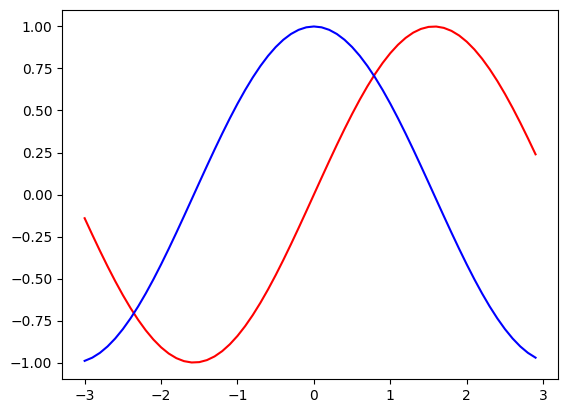

In [16]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-3,3,.1) 
sinx = np.sin(x)
cosx = np.cos(x)
plt.plot(x,sinx,'red')
plt.plot(x,cosx,'blue')
plt.show()

#OLD
#x = np.arange(-5,5,.3) 
#y = np.sin(x)
#plt.plot(x,y)
#plt.show()


1.3.2 Research the following functions using the documentation: The matplotlib scatter function: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html and the numpy random sampling functions: https://numpy.org/doc/1.16/reference/routines.random.html. Your goal is to write a short snipplet of python that produces two plots as described below. Make sure to import the required libraries. 

<br>

1. (2 points) A scatter plot of 1000 samples from the uniform distribution on [0,1] x [0,1] with each sample shown as a blue dot in the plot.



2. (2 points) A scatter plot of 1000 samples from the standard normal/Gaussian distribution in 2 dimensions and centered at the origin (0, 0) in two dimensions. Display each sample as a red cross.

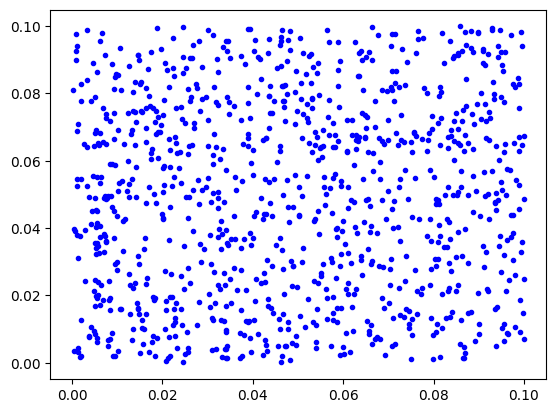

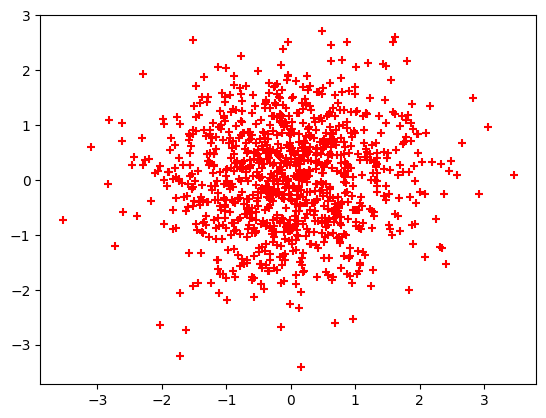

In [17]:
import matplotlib.pyplot as plt
import numpy as np

N = 1000

#1. 
uniform_x = np.random.uniform(0, .1, N)
uniform_y = np.random.uniform(0, .1, N)

plt.scatter(x=uniform_x, y=uniform_y, c='blue', marker='.')
plt.show()


#2. 
normal_x = np.random.standard_normal(N)
normal_y = np.random.standard_normal(N)

plt.scatter(x=normal_x, y=normal_y, c='red', marker='+')
plt.show()